In [ ]:
# example 21

import numpy as np

s = lambda x,c: np.sqrt(pow(x[0]-c[0],2) + pow(x[1]-c[1],2))
r = lambda x,c: s(x,c) - c[2]
drx = lambda x,c: (x[0]-c[0])/s(x,c)
dry = lambda x,c: (x[1]-c[1])/s(x,c)

c = np.array([[-1,0,1],[1,.5,.5],[1,-.5,.5]]) # [x,y,R]
x_old = np.zeros((2))
x_new = x_old.copy()
n_eqns = len(c)
n_vars = len(x_old)
a = np.zeros((n_eqns,n_vars))
b = np.zeros((n_eqns))
for k in range(10):
  for i in range(n_eqns):
    a[i,0] = drx(x_old,c[i])
    a[i,1] = dry(x_old,c[i])
    b[i] = r(x_old,c[i])
  ata = a.T @ a
  atb = a.T @ (-b)
  delta = np.linalg.solve(ata,atb)
  x_new = x_old + delta
  print(f"{k}: {x_old} + {delta} = {x_new} w n2 = {np.linalg.norm(x_new-x_old):.7f}")
  x_old = x_new.copy()


0: [0. 0.] + [4.25220311e-01 1.33890431e-17] = [4.25220311e-01 1.33890431e-17] w n2 = 0.4252203
1: [4.25220311e-01 1.33890431e-17] + [-1.40950026e-02  1.11742215e-19] = [4.11125309e-01 1.35007853e-17] w n2 = 0.0140950
2: [4.11125309e-01 1.35007853e-17] + [ 2.00618452e-03 -7.91977936e-21] = [4.13131493e-01 1.34928656e-17] w n2 = 0.0020062
3: [4.13131493e-01 1.34928656e-17] + [-2.73157656e-04  9.67240418e-21] = [4.12858335e-01 1.35025380e-17] w n2 = 0.0002732
4: [4.12858335e-01 1.35025380e-17] + [ 3.74286383e-05 -1.23093430e-21] = [4.12895764e-01 1.35013070e-17] w n2 = 0.0000374
5: [4.12895764e-01 1.35013070e-17] + [-5.12413563e-06  8.59429292e-23] = [4.1289064e-01 1.3501393e-17] w n2 = 0.0000051
6: [4.1289064e-01 1.3501393e-17] + [ 7.01598195e-07 -2.60161357e-23] = [4.12891342e-01 1.35013670e-17] w n2 = 0.0000007
7: [4.12891342e-01 1.35013670e-17] + [-9.60614841e-08 -1.09814935e-25] = [4.12891245e-01 1.35013668e-17] w n2 = 0.0000001
8: [4.12891245e-01 1.35013668e-17] + [ 1.31525839e-08 

newton-gauss step 0: [47.4574,0.0790] w error = 2.5426
newton-gauss step 1: [55.8620,0.0612] w error = 8.4046
newton-gauss step 2: [58.6062,0.0576] w error = 2.7442
newton-gauss step 3: [58.5030,0.0577] w error = 0.1032
newton-gauss step 4: [58.5077,0.0577] w error = 0.0048
newton-gauss step 5: [58.5075,0.0577] w error = 0.0002
newton-gauss step 6: [58.5075,0.0577] w error = 0.0000


,year,cars,model,error
0,1950,53.05,58.507544,-5.4575
1,1955,73.04,78.080217,-5.0402
2,1960,98.31,104.200585,-5.8906
3,1965,139.78,139.059064,0.7209
4,1970,193.48,185.578837,7.9012
5,1975,260.20,247.660984,12.5390
6,1980,320.39,330.511626,-10.1216


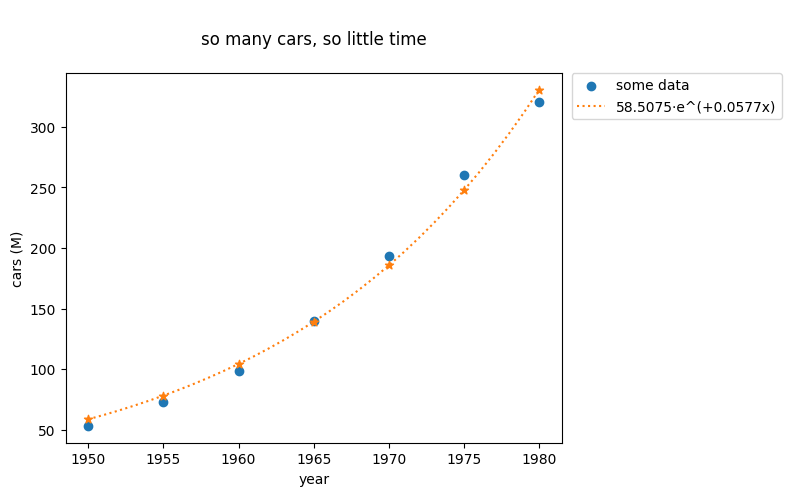

In [ ]:
# example 24

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():

  # model, descriptors
  f = lambda cs,x: cs[0]*np.exp(cs[1]*x)
  sf = lambda cs: f"{cs[0]:.4f}·e^({cs[1]:+.4f}x)"
  sf_y_axis = "cars"
  sf_y_units = sf_y_axis + " (M)"

  # data, offsets
  xs_offset = 1950
  h = 5
  xs = np.arange(0,31,h) # [1950,1980]
  ys = np.array([53.05,73.04,98.31,139.78,193.48,260.20,320.39]) # b
  # data, interval w higher resolution to display functions smoothly
  xs_dis = np.linspace(min(xs),max(xs),(len(xs)-1)*h+1)

  # r(x), dr(x)
  r = lambda cs,x,y: f(cs,x) - y
  dr1 = lambda cs,x,y: np.exp(cs[1]*x)
  dr2 = lambda cs,x,y: f(cs,x)*x

  # parms, run-time
  eps = 1e-5
  imax = 10 # lol, not even this
  cs_old = np.array([50,.1])
  cs_new = cs_old.copy()

  n_eqns = len(ys)
  n_vars = len(cs_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  for k in range(imax):
    for i in range(n_eqns):
      # build a = DF
      a[i,0] = dr1(cs_old,xs[i],ys[i])
      a[i,1] = dr2(cs_old,xs[i],ys[i])
      # build b = r = f - y
      b[i] = r(cs_old,xs[i],ys[i])

    # least squares
    if False:
      # short way: numpy
      delta = np.linalg.lstsq(a,-b,rcond=None)
    else:
      # long way
      ata = a.T @ a
      atb = a.T @ (-b)
      delta = np.linalg.solve(ata,atb)

    cs_new = cs_old + delta
    cs_old = cs_new.copy()
    error = np.linalg.norm(delta)
    print(f"newton-gauss step {k}: [{cs_new[0]:.4f},{cs_new[1]:.4f}] w error = {error:.4f}")
    if error < eps:
      break

  ri_lsq = r(cs_new,xs,ys)
  yi_lsq = f(cs_new,xs)
  ys_lsq = f(cs_new,xs_dis)

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True:
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,4),np.nan) # cols = t,T,(y,err)x3
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lsq
    ps[:,3] = ps[:,1] - ps[:,2]
    sCol = ["year",sf_y_axis,"model","error"]
    df = pd.DataFrame(data=ps,columns=sCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format)
    df["year"] = df["year"].apply("{:.0f}".format)
    display(df)

  if True:
    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lsq,c="C1",marker="*")
    plt.plot(xs_dis,ys_lsq,c="C1",linestyle=":",label=sf(cs_new))

    # plot, style
    plt.title("\nso many " + sf_y_axis + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel("year")
    plt.ylabel(sf_y_units)

    # plot, display
    plt.show()

if __name__ == "__main__":
  main()
